In [ ]:
# Building an Image classifier using the Sequential API

Fashion MNIST has 70,000 grayscale images of 28*28 pixels each with 10 classes

In [69]:
# Using keras to load the dataset

import tensorflow as tf
import keras
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
# The keras laod data is used to divide the data into splits of test and train. This data can also be visualized as a split between actual data and the predicted labels.
(X_train_full, y_train_full), (X_test, y_test)= fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# It is always good practice to make a validation dataset

X_valid, X_train=X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train=y_train_full[:5000],  y_train_full[5000:]
X_test=X_test/255.0

In [6]:
# In order to understand the numbers being output by the model
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
# Shapes of the data in which we split
X_train.shape, X_valid.shape, y_train.shape, y_test.shape

((55000, 28, 28), (5000, 28, 28), (55000,), (10000,))

In [10]:
class_names[y_train[0]]

'Coat'

In [13]:
# Creating the model using the Sequential API:-

model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=[28,28]),
                           tf.keras.layers.Dense(300, activation='relu'),
                           tf.keras.layers.Dense(100, activation='relu'),
                           tf.keras.layers.Dense(10, activation='softmax')
])

The Sequential API is the simplest kind of Keras model for Neural networks.

The Flatten layers helps in converting the initial 2-D array to a 1-D array. We however need to specify the input_shape which doesn't include the batch size and only the shape of the instances.

We have a bunch of Dense layers followed by the ouput layer which usually has the same shape as the number of classes. The softmax function ensures that the sum of all the probabilties is equal to 1.

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In the model.summary() we can find the number of parameters, number of layers and the parameters it holds.

In [15]:
# This call outputs the layers in our current model
model.layers

In [16]:
hidden1= model.layers[1]

In [17]:
weights, biases = hidden1.get_weights()

In [19]:
# Biases are always at 0 and they represent the neuron bias. The weights are randomly assigned to instantiate.
weights, biases

(array([[ 0.03423005,  0.05671801,  0.06036411, ...,  0.00162259,
         -0.0552145 , -0.07018899],
        [-0.01939819,  0.02384643, -0.07436568, ...,  0.02299723,
          0.03865711,  0.00714811],
        [-0.01971736,  0.0569859 ,  0.02949087, ..., -0.00488377,
         -0.03284942,  0.00563604],
        ...,
        [-0.06967573,  0.03612837,  0.03607208, ..., -0.01197188,
         -0.06105497, -0.00180122],
        [ 0.03065901,  0.04440924, -0.01747826, ...,  0.0013073 ,
         -0.00886559,  0.07003595],
        [ 0.03726283,  0.04158851, -0.04952414, ..., -0.03782443,
          0.04790769, -0.01822458]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [22]:
# Compiling the model

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
               optimizer='sgd',
               metrics=['accuracy'])

The SGD() optimizer will train the model using Simple Stochastic Gradient Descent. In other words Keras will perform the backpropogation algorithm to calculate the same.

In [24]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7151 - accuracy: 0.7642 - val_loss: 0.5400 - val_accuracy: 0.8066
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4875 - accuracy: 0.8291 - val_loss: 0.4566 - val_accuracy: 0.8410
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4432 - accuracy: 0.8440 - val_loss: 0.4131 - val_accuracy: 0.8562
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4170 - accuracy: 0.8541 - val_loss: 0.4288 - val_accuracy: 0.8512
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3971 - accuracy: 0.8608 - val_loss: 0.3858 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3810 - accuracy: 0.8663 - val_loss: 0.3790 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3686 - accuracy: 0.8696 - val_loss: 0.3622 - val_accuracy:

In the above fit function we see that we get metrics such as loss and accuracy at the end of each epoch.

Note 📝:- If the training data is very skewed we can set the class_weight argument when calling the fit() emthod. This woudl allow for a larger weight to underr represented classes to ensure equality of visibility.

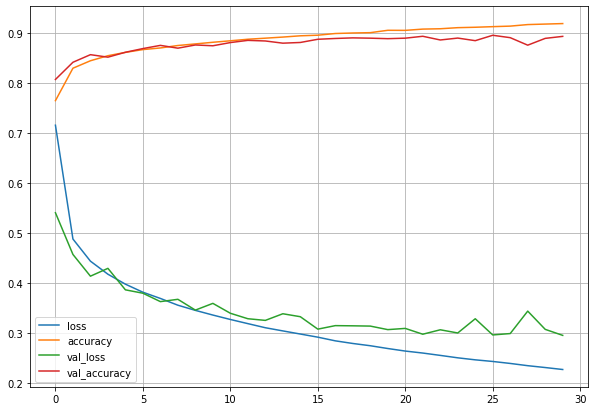

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

The fit methos returns a history object containing the training parameters, the list of epcohs it went through and the training parameters such as loss and validation

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8819


[0.3364441692829132, 0.8819000124931335]

In [28]:
# USING THE MODEL TO MAKE PREDICITONS

X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
# We can see that using the softmax function ensures that all the class probabilities are below 1 and add upto 1.
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Building a Regression MLP using the Sequential API

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing=fetch_california_housing()

In [35]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [42]:
# Each housing has 8 parameters
X_train_full[0]

array([ 3.28130000e+00,  2.80000000e+01,  5.14484680e+00,  1.00557103e+00,
        1.99900000e+03,  2.78412256e+00,  3.41000000e+01, -1.17910000e+02])

In [43]:
X_train,X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [44]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit(X_test)
X_valid= scaler.fit(X_valid)

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD())
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8097 - val_loss: 6.4383
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5492 - val_loss: 7.3725
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5188 - val_loss: 0.3890
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4110 - val_loss: 0.3790
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4001 - val_loss: 0.3778
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3897 - val_loss: 0.4048
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3940 - val_loss: 0.3814
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3862 - val_loss: 0.3904
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3744 - val_loss: 0.3817
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3712 - val_loss: 0.3885

In [55]:
y_pred

array([[0.541547 ],
       [1.7171514],
       [4.238215 ]], dtype=float32)

## Implementing a wide and Deep Neural network using the Functional API

In [64]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output])

First we need to create an Input object. This is a specialization of the kind of input the model will get, including its shape and dtype.

We then pass the input layer as function to the hidden1 layer. This acts as a functional API as it only tells how to connect the multiple layers and there is no data flowing through the model yet.



In [71]:
# Therefore in order to run the model we need to send two inputs to the model even when we use the Test data or the Validation data

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.SGD())

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7806 - val_loss: 0.4670
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4608 - val_loss: 0.7599
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4569 - val_loss: 0.3991
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4159 - val_loss: 0.5518
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4104 - val_loss: 0.5989
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4002 - val_loss: 1.2006
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4105 - val_loss: 1.5138
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3964 - val_loss: 0.6090
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3836 - val_loss: 0.3629
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3779 - val_loss: 0.3919

In [72]:
model.save("my_keras_model.h5")

In [73]:
model = keras.models.load_model("my_keras_model.h5")

In [74]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3424


In [75]:
model.save_weights("my_keras_weights.ckpt")

In [76]:
model.load_weights("my_keras_weights.ckpt")

In [77]:
# Using Callbacks during training

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [82]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD())
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 0.7291 - val_loss: 1.6998
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4603 - val_loss: 5.4596
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4734 - val_loss: 0.9560
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3869 - val_loss: 0.5582
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3801 - val_loss: 2.3042
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3933 - val_loss: 5.3099
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4573 - val_loss: 0.3759
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3729 - val_loss: 0.3532
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3615 - val_loss: 0.3619
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.3688
